# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from matplotlib import style

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# ----
# Try the indirect path if the direct path doesn't work.
# ---

#city_data_to_load = os.path.join("Resources", "city_data.csv")
#ride_data_to_load = os.path.join("Resources", "ride_data.csv")


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_count = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
total_rides_count.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_count = pyber_data_df.groupby(["city"]).count()["driver_count"]
total_drivers_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.pivot(index='date', columns='type', values='fare')
total_fares

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [6]:
#  4. Get the average fare per ride for each city type. 
average_fair = pyber_data_df.loc['2019-01-01':'2019-04-28']
average_fair.head()

,city,date,fare,ride_id,driver_count,type


In [7]:
# 5. Get the average fare per driver for each city type. 
average_fair.index = pd.to_datetime(average_fair.index)
average_fair.head()

,city,date,fare,ride_id,driver_count,type


In [8]:
#  6. Create a PyBer summary DataFrame. 
average_fair.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          0 non-null      object 
 1   date          0 non-null      object 
 2   fare          0 non-null      float64
 3   ride_id       0 non-null      int64  
 4   driver_count  0 non-null      int64  
 5   type          0 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 0.0+ bytes


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
average_fair_clean = average_fair.resample('W').sum()
average_fair_clean

,city,date,fare,ride_id,driver_count,type


ValueError: zero-size array to reduction operation fmin which has no identity

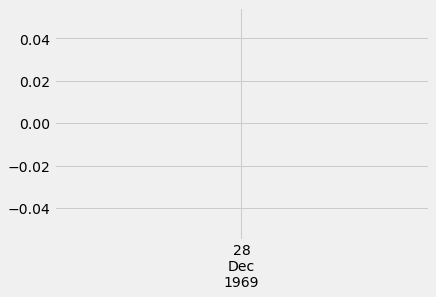

In [11]:
#  8. Format the columns.
style.use('fivethirtyeight')
average_fair_clean.plot(ylabel="Fare ($USD)", xlabel="", title="Total Fare by City Type")
plt.savefig("analysis/PyBer_fare_summary.png")

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
results_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])

In [18]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_rides = results_df.groupby(["type"]).count()["ride_id"]
total_rides_int = results_df.count()["ride_id"]

In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_drivers = results_df.groupby(["type"]).sum()["driver_count"]
total_drivers_int = results_df.sum()["driver_count"]

In [20]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_series = results_df.groupby(["type"]).sum()["fare"]
total_fares_fl = results_df.sum()["fare"]

In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_per_ride = results_df.groupby(["type"]).mean()["fare"]
average_fare = results_df.mean()["fare"]


In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_summary = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,




NameError: name 'ser_fare_per_ride' is not defined